In [1]:
from acip.acip import ACIP
from utils.utils_experiment import read_config, load_data
from matplotlib import pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#plt.ioff()
dataset = 'spleen'
X, Y = load_data(dataset)
w = ACIP(X, Y, config=dataset, verbose=True)

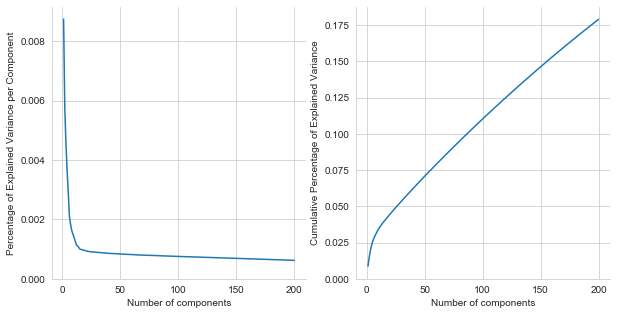

In [7]:
w.pca_plot_var_ratio(200)

In [13]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

KeyboardInterrupt: 

(array([ 296.,  926.,  931., 1094., 1132., 1247., 1327.,  982.,  713.,
         660.]),
 array([0.02269262, 0.12040599, 0.21811937, 0.31583273, 0.41354612,
        0.5112595 , 0.60897285, 0.70668626, 0.8043996 , 0.902113  ,
        0.9998264 ], dtype=float32),
 <a list of 10 Patch objects>)

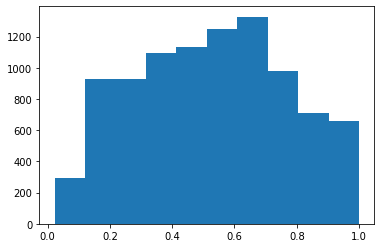

In [9]:
plt.hist(np.var(X, axis=0))

In [23]:
gene_variances = np.var(X, axis=0)
highest_var_gene_indices = gene_variances.argsort()[: int(0.2 * X.shape[1])]
x_train_filtered = X[:, highest_var_gene_indices]

In [22]:
highest_var_gene_indices[int(0.2 * X.shape[1])]

7104

In [11]:
np.var(X, axis=0).shape

(9308,)

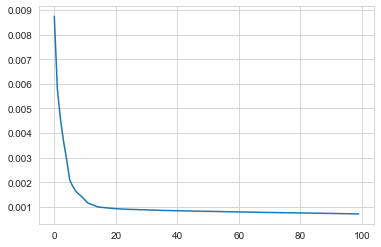

In [12]:
plt.plot(pca.explained_variance_ratio_)


*********** Reducing dimensionality **************
Using pca.
Using the following params:
{
    "n_components": 15
}
Embedding created. MSE: 0.5062139
Used 15 components.

****************** Clustering ********************
Using kmedoids.
Using the following params:
{
    "metric": "correlation"
}
Trying n_clusters=64: 100%|██████████| 32/32 [00:36<00:00,  1.15s/it]
Clustering complete.
Highest silhouette score is achieved for n_clusters = 10

***************** Visualizing ********************
Using umap with the following params:
{
    "dims": 2,
    "metric": "correlation",
    "min_dist": 0,
    "n_neighbors": 15
}
Reducing dimensionality for visualization using umap.


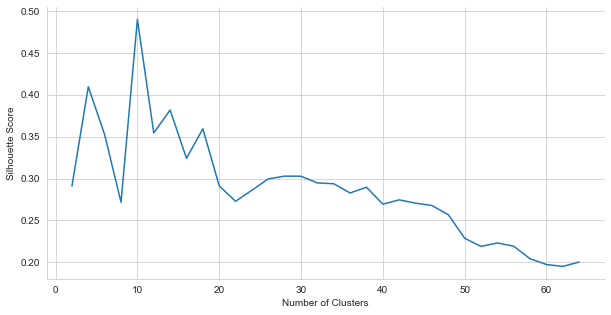

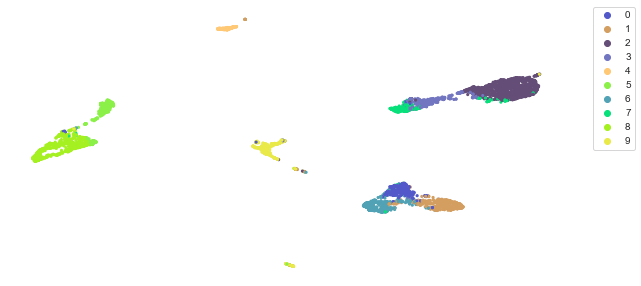

In [3]:
w.flow()

In [5]:
ml = [(0, x) for x in range(2000)]
ml2 = [(2000, x) for x in range(2000, X.shape[0])]
ml = ml + ml2
cl = [(0, 2000)]
constraints = {'ml': ml, 'cl': cl}

In [10]:
w.cluster_constraints(method='pckmeans', constraints=constraints)


********* Clustering with constraints ************
Using pckmeans.
Trying n_clusters=2:   0%|          | 0/32 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
w.reduce_plot()